In [4]:

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plot
import pandas as pd

In [5]:
################################  analyse du dataset du coronavirus  ################################################

In [6]:
data=pd.read_excel("C:/Users/HP/Documents/dataset.xlsx")
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Identification rapide du target
data.head(5)
#le target c'est SARS-Cov-2 exam result

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Identifier les dimensions du dataset

data.shape
#soit 5644 lignes et 111 colonnes 

(5644, 111)

In [5]:
#identifier les types de variables

data.dtypes
#nous disposons de 11variables de types int float et object

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [6]:
#Identifier la proportion de chaque variable
data.dtypes.value_counts()
#On a 70 float,37 object,4 int

float64    70
object     37
int64       4
dtype: int64

In [7]:
#Reperer les valeurs manquantes
data.isna().value_counts()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  Patient addmited to regular ward (1=yes, 0=no)  Patient addmited to semi-intensive unit (1=yes, 0=no)  Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  Mean corpuscular volume (MCV)  Monocytes  Red blood cell distribution width (RDW)  Serum Glucose  Respiratory Syncytial Virus  Influenza A  Influenza B  Parainfluenza 1  CoronavirusNL63  Rhinovirus/Enterovirus  Mycoplasma pneumoniae  Coronavirus HKU1  Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  Parainfluenza 2  Neutrophils  Urea   Proteina C reativa mg/dL  Creatinine  Potassium  Sodium  Influenza B, rapid test  Influenza A, rapid test  Alanine transamin

<AxesSubplot:>

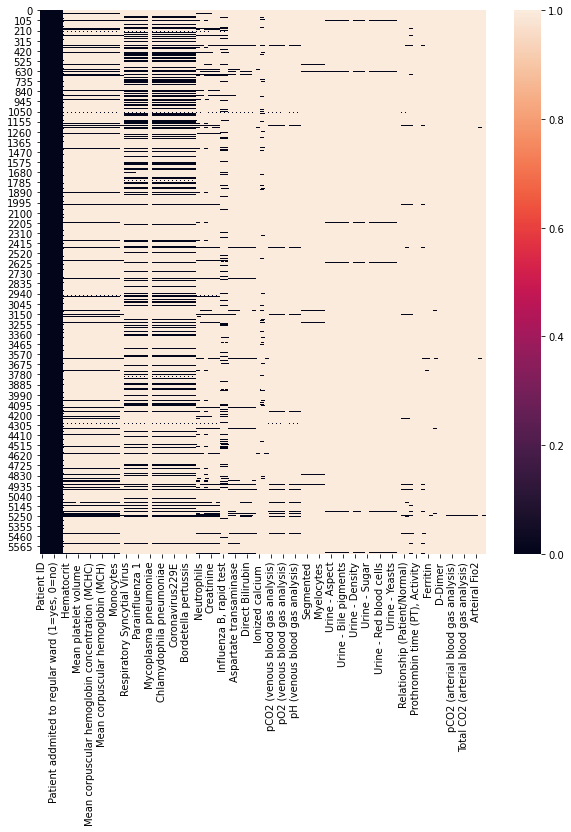

In [8]:
# visialisation des valeurs manquantes en fonction des features
plot.figure(figsize=(10,10))
sb.heatmap(data.isna())

In [49]:
#conclusion:ON remarque qu il y a plus de valeusr non nan pour les features allant de respiratory virus au  neutrophilis

In [9]:
#Nous allon quantifier le taux d'element nan sur les colonnes

data.isna().sum()
#Diviser par le nombre d eligne on obtient une proportion
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)
#on remarque que le hco3 po2 arteiral fio2 Phosphor ct02 ont beaucoup de valeurs manquantes
#on doit les eliminer avant de passer a la modelisation


Prothrombin time (PT), Activity                          1.0
D-Dimer                                                  1.0
Mycoplasma pneumoniae                                    1.0
Urine - Sugar                                            1.0
Partial thromboplastin time (PTT)                        1.0
                                                        ... 
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
SARS-Cov-2 exam result                                   0.0
Patient age quantile                                     0.0
Patient ID                                               0.0
Length: 111, dtype: float64

In [21]:
#Mycoplasma pneumoniae contient uniquement des valeurs manquantes
print(data.isna().mean().head(30))

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


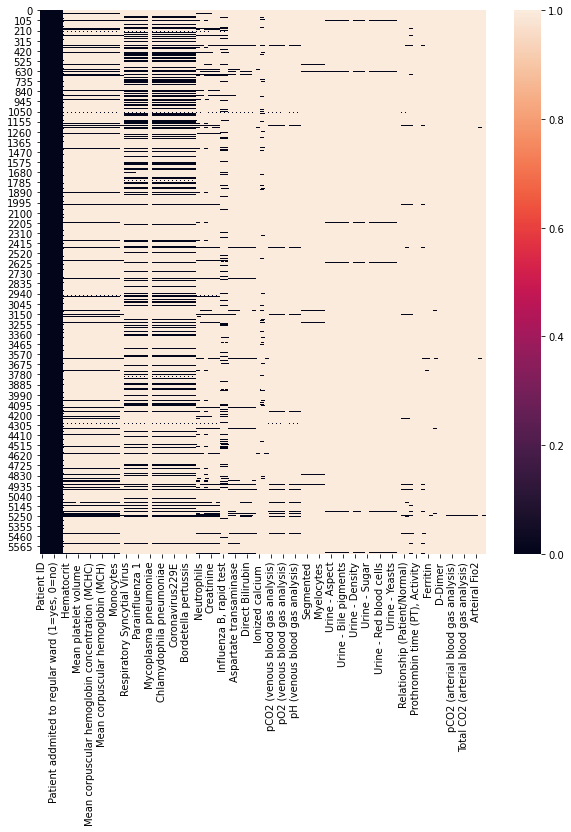

In [13]:
#on identifie ensuite les colonnes presentant le plus de valeurs nan et on les elimine

a=(data.isna().mean()>0.88)
data.columns[a]
#on injecte le resultat dans la dataframe
plot.figure(figsize=(10,10))
sb.heatmap(data.isna())

data=data[data.columns[a]]
data

In [25]:
#On doit examiner notre target SARS-Cov-2 exam result
data["SARS-Cov-2 exam result"].value_counts(normalize=True)
#on a 5086 NEGATIFS ET 558 POSITIFS

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [1]:
#histogramme des variables continues


print("distribution de la variable de type float:") 
for col in data.select_dtypes('float'):
    plot.figure(figsize=(10,10))
    sb.displot(data[col])

 
 #on visualise la distribution de nos variables de types float  



distribution de la variable de type float:


NameError: name 'data' is not defined

<AxesSubplot:>

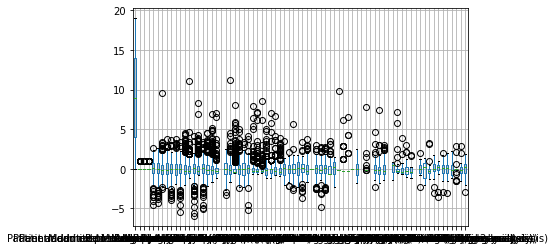

In [59]:
data.boxplot() 

       
       
   


In [62]:
data.columns


Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

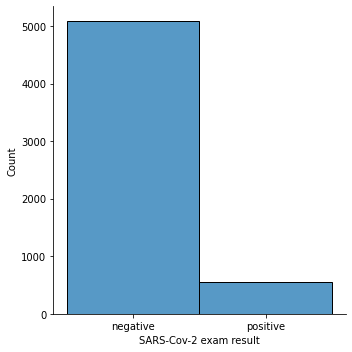

In [73]:
sb.displot(data["SARS-Cov-2 exam result"])

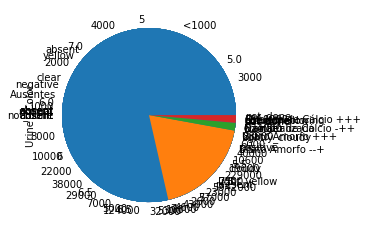

In [14]:
#histogramme des variables discretes
 
for col in data.select_dtypes('object'):
 
    
    plot.figure
    data[col].value_counts().plot.pie()

In [115]:
data[col].value_counts()


yellow           55
light_yellow     13
citrus_yellow     1
orange            1
Name: Urine - Color, dtype: int64

<AxesSubplot:ylabel='Urine - Color'>

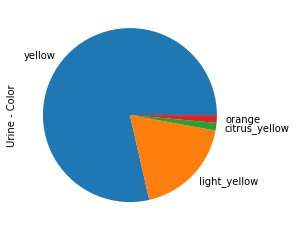

In [116]:

data[col].value_counts().plot.pie()

In [123]:
#on cree des sous ensembles 
#soit pos le sous ensemble des individus positifs
positif= data[data["SARS-Cov-2 exam result"]=="positive"]

In [124]:
data["SARS-Cov-2 exam result"]=="positive"

0       False
1       False
2       False
3       False
4       False
        ...  
5639     True
5640    False
5641    False
5642    False
5643     True
Name: SARS-Cov-2 exam result, Length: 5644, dtype: bool

In [129]:
positif= data[data["SARS-Cov-2 exam result"]=="positive"]

In [130]:
positif

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,78511c183ae18bc,7,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,d7834ed75f2da44,16,positive,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,b16b49f7bd3e692,10,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,4382f5ea05e60c4,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,d3729cd2658ca64,15,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,5c386388ba3c3f0,16,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5633,9f8dfe2ae239238,4,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5634,db77903261ab6d0,15,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#on cree un sous ensemble des personnes negatives
negatiif= data[data["SARS-Cov-2 exam result"]=="negative"]
negatiif

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,2ea15fb0c220027,12,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5638,21af7c93c7fc540,14,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
moy= data.isna().mean()
plot.figure(figsize=(10,10))
sb.displot(manquant)

NameError: name 'manquant' is not defined

<Figure size 720x720 with 0 Axes>

In [12]:
blood=data.columns[(moy>0.88)&(moy<0.90)]
viral=data.columns[(moy>0.75)&(moy<0.88)]
viral
blood

NameError: name 'moy' is not defined

In [10]:
#Target blood

for i in blood:
    plot.figure()
   
    sb.displot(positif[i], legend='positif')
    sb.displot(negatiif[i],legend='negatif')
    sb.countplot(x="Patient age quantile",hue="SARS-Cov-2 exam result",data=data)
    

NameError: name 'blood' is not defined

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

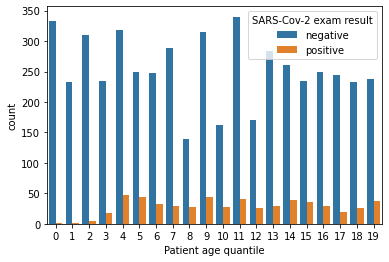

In [211]:
sb.countplot(x="Patient age quantile",hue="SARS-Cov-2 exam result",data=data)

In [216]:
pd.crosstab(data['SARS-Cov-2 exam result'],data['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


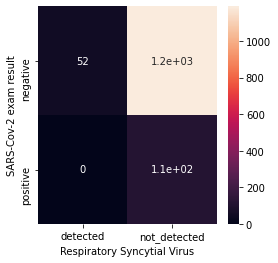

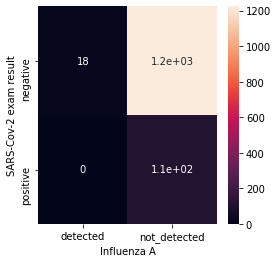

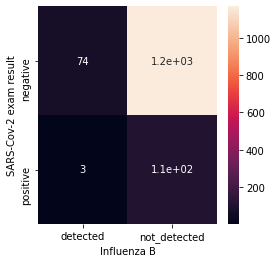

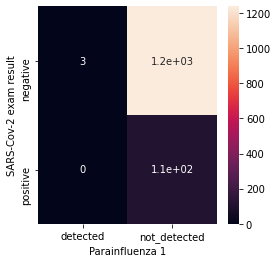

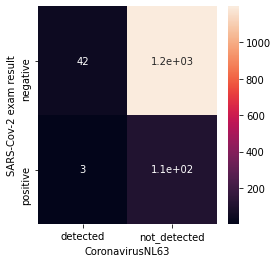

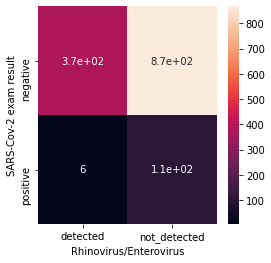

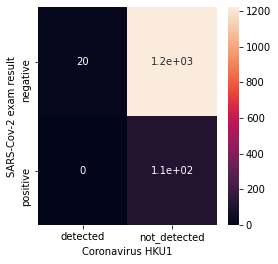

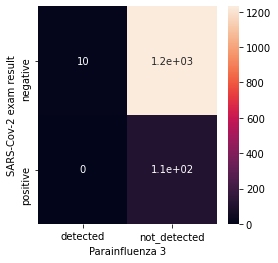

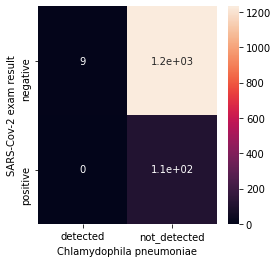

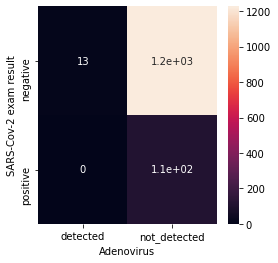

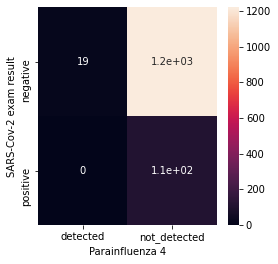

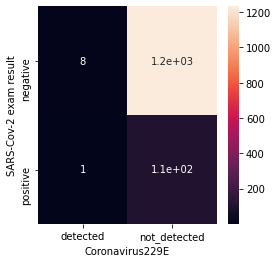

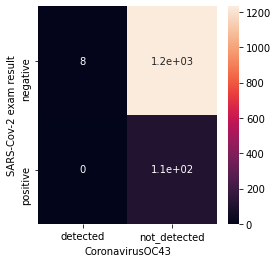

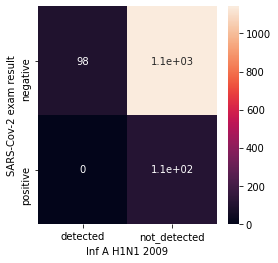

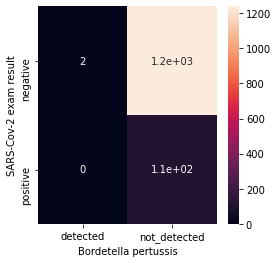

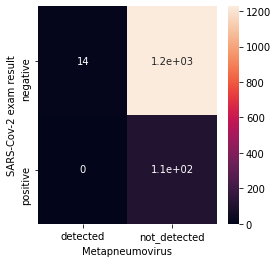

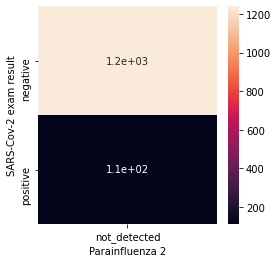

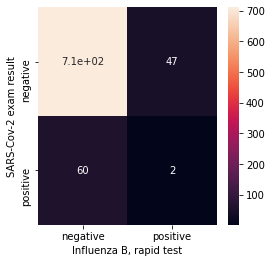

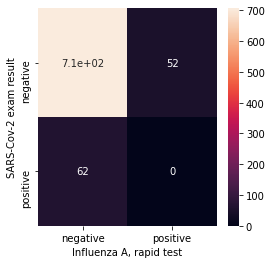

In [223]:
for i in viral:
    plot.figure(figsize=(4,4))
    sb.heatmap(pd.crosstab(data["SARS-Cov-2 exam result"],data[i]),annot=True)

In [225]:
#on remarque quil est rare davoir le covid et le rinhovirus et l enterovirus a la fois

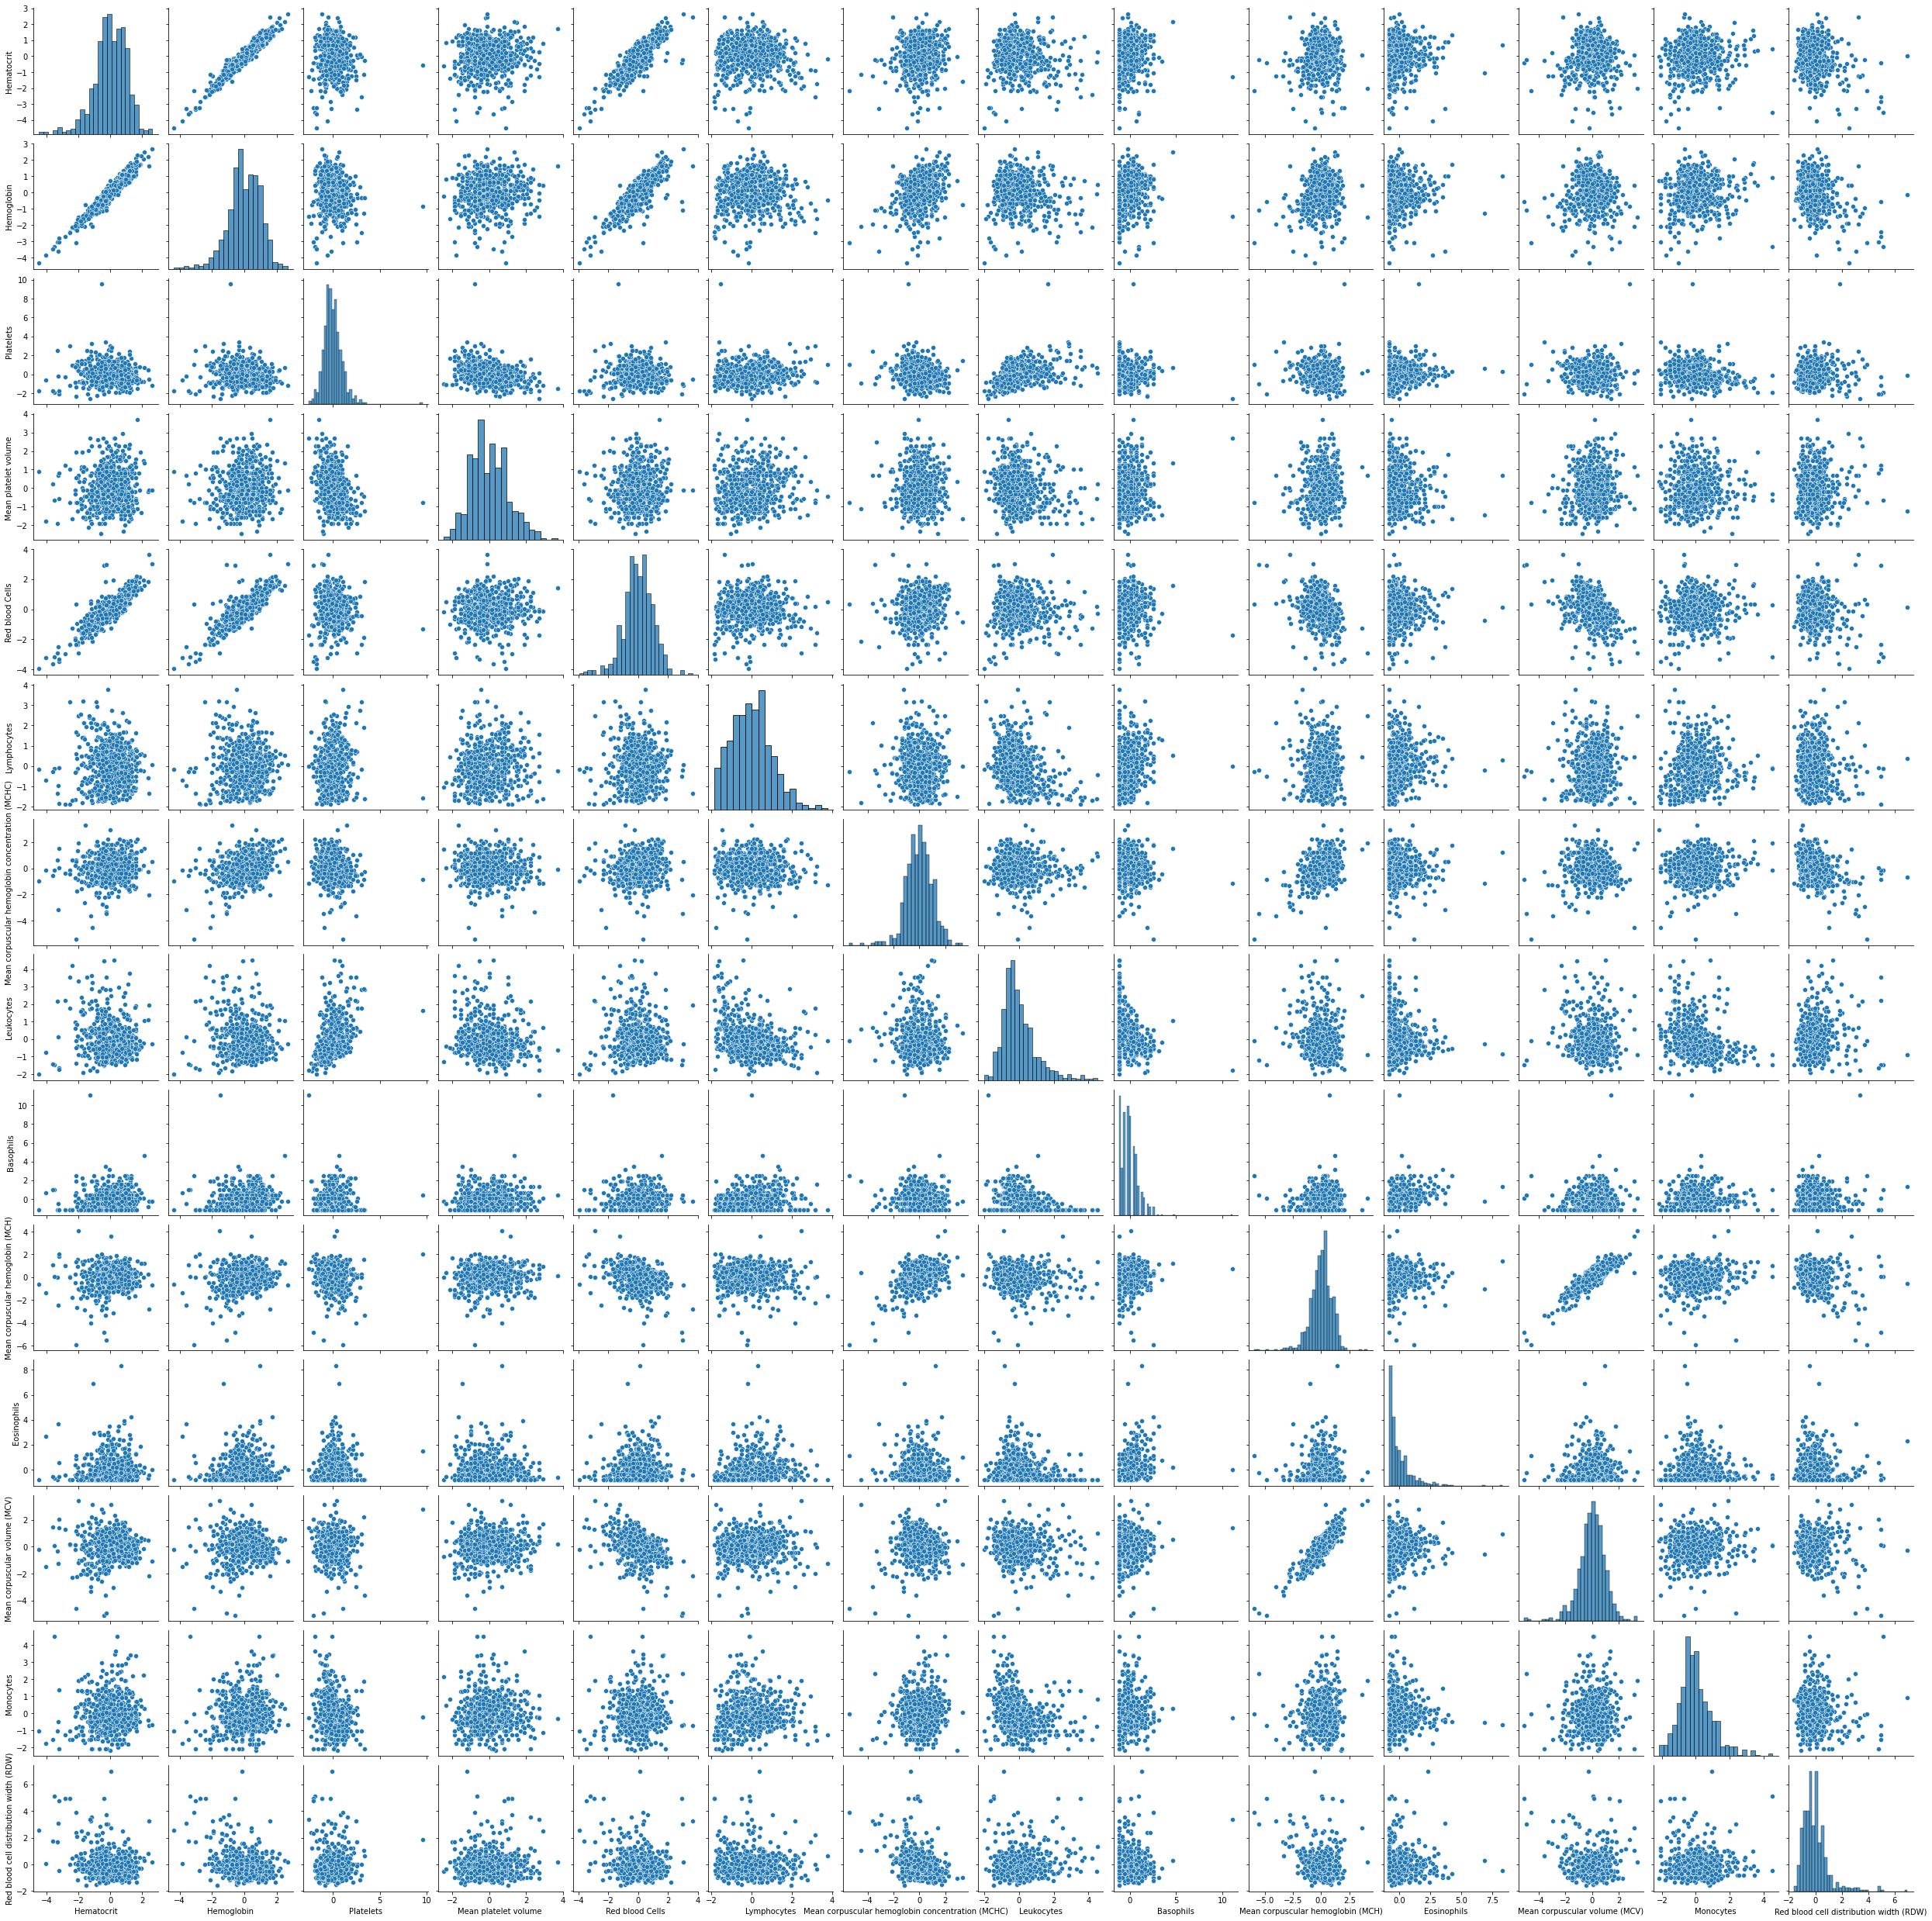

In [233]:
sb.pairplot(blood)

<AxesSubplot:>

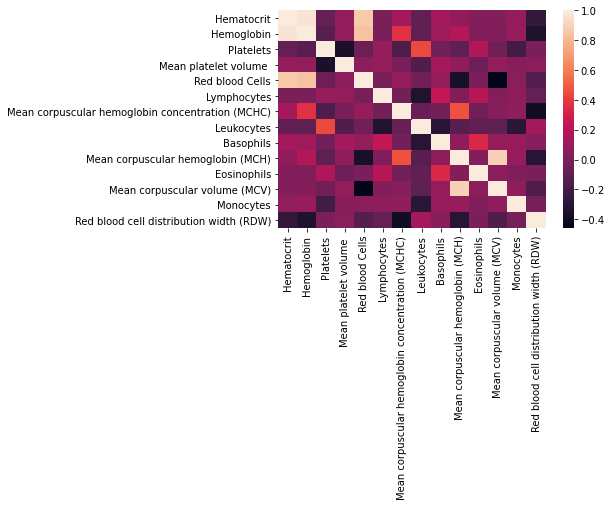

In [236]:
#on represente la coorrelation entre les elements de blood 
sb.heatmap(blood.corr())

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

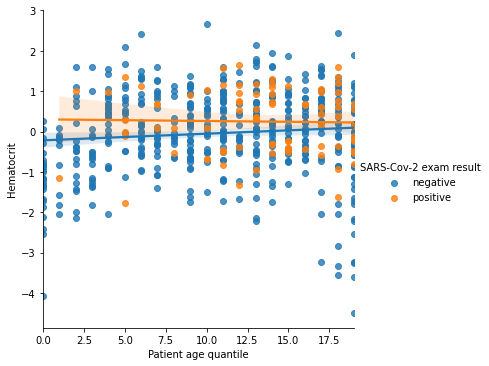

<Figure size 432x288 with 0 Axes>

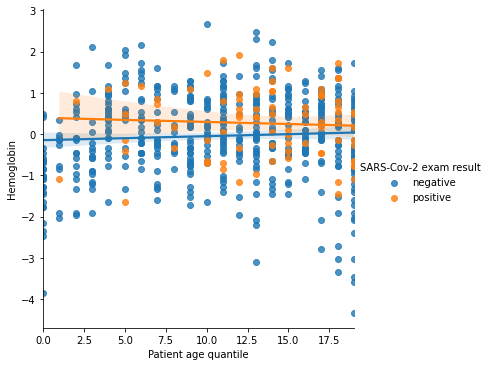

<Figure size 432x288 with 0 Axes>

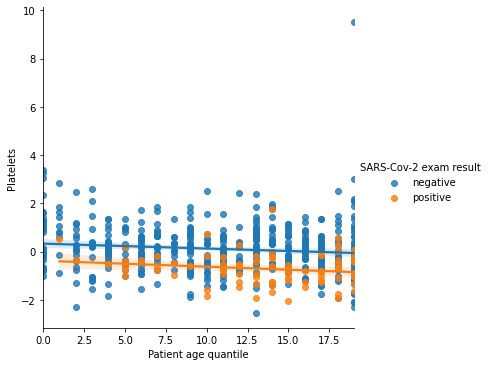

<Figure size 432x288 with 0 Axes>

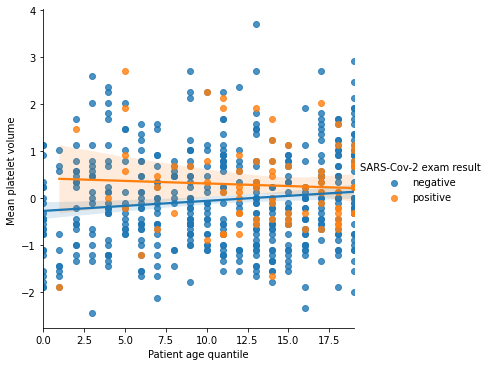

<Figure size 432x288 with 0 Axes>

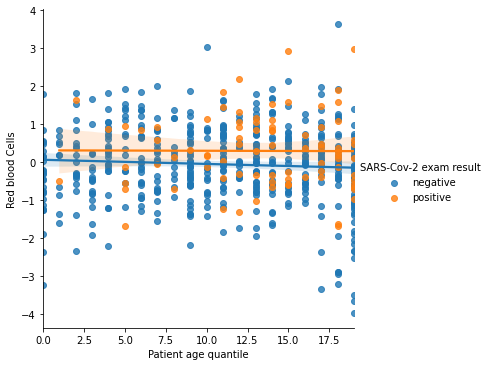

<Figure size 432x288 with 0 Axes>

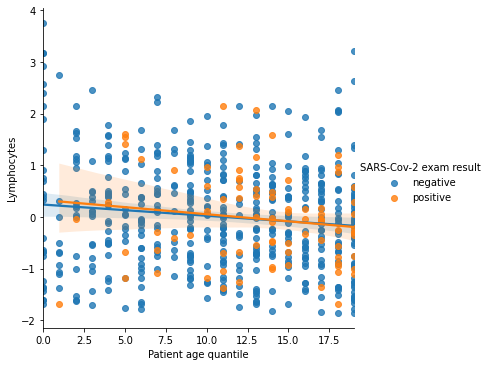

<Figure size 432x288 with 0 Axes>

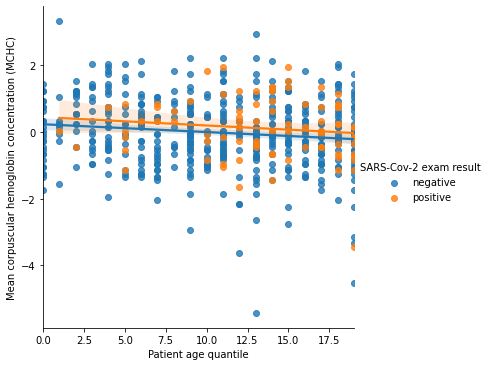

<Figure size 432x288 with 0 Axes>

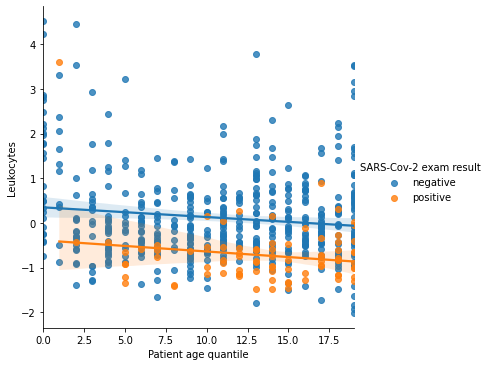

<Figure size 432x288 with 0 Axes>

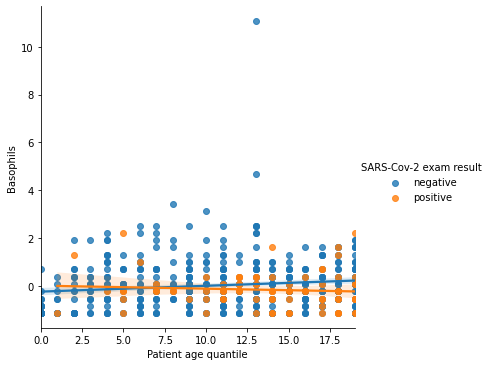

<Figure size 432x288 with 0 Axes>

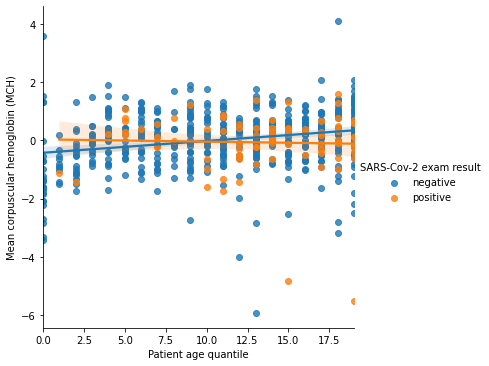

<Figure size 432x288 with 0 Axes>

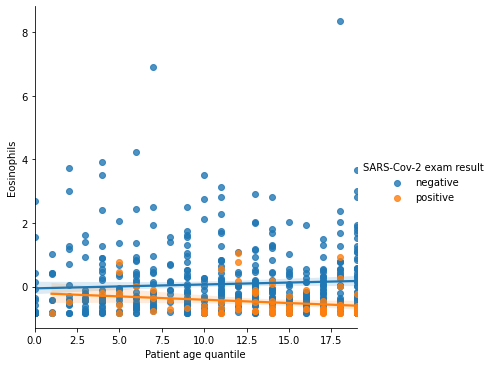

<Figure size 432x288 with 0 Axes>

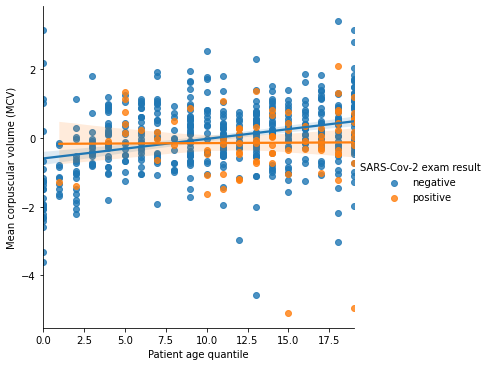

<Figure size 432x288 with 0 Axes>

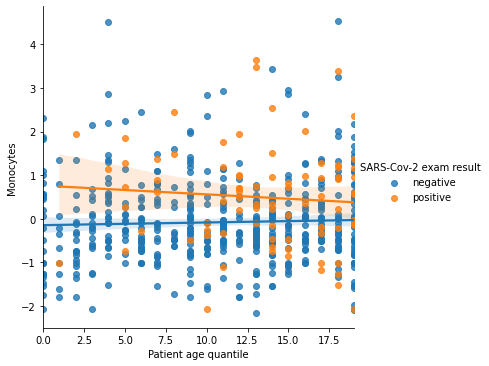

<Figure size 432x288 with 0 Axes>

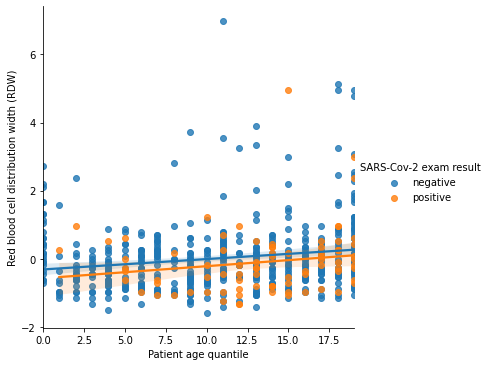

In [240]:
#Target blood

for i in blood:
    plot.figure()
   
    sb.lmplot(x='Patient age quantile',y=i,hue="SARS-Cov-2 exam result",data=data)

In [20]:
def performance(y_test,y_predict):
    import  sklearn.metrics as metrics
    conf=metrics.confusion_matrix(y_test,y_predict)
    print("matrice de confussion:",conf)
    a_s=metrics.accuracy_score(y_test,y_predict)
    print(" Taux de succès:",a_s)
    error=1.0-a_s
    print("taux d'erreur:",error)
    return conf,a_s,error
    
    